In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import time as time

In [2]:
# copy paste this code to the beginning of your script to set the plotting style for a one column figure

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"]
})

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,4.2)
plt.rcParams["figure.titlesize"] = 11 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 11 # control title size
plt.rcParams["axes.labelsize"] = 11 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 11 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 11 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 7.5 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "upper left" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
# plt.rcParams["lines.markeredgewidth"] = 0.7
plt.rcParams["lines.markersize"] = 4 #data point size

plt.rcParams["grid.linestyle"] = "--"
plt.rcParams['axes.grid'] = True
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
# plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7

# plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2) # remove unnecessary white space how i like it

In [3]:
# for interactive plot where you can zoom in and stuff, use this code instead

# import matplotlib
# matplotlib.use('TkAgg')  # Set the interactive backend
# import matplotlib.pyplot as plt

In [4]:
import pandas as pd
import numpy as np 

# PDH Locked Wavemeter Plot, Data from 241201

In [16]:
filename = "copy 01.12.2024, 22.48,  434.82882358 THz excel.xlsx"
df = pd.read_excel(filename,header=69)

In [17]:
df

,24500.6889,689.401654,13.15,Unnamed: 3,Unnamed: 4
0,2.475073e+04,689.401654,13.11,NaN,NaN
1,2.500092e+04,689.401654,13.11,NaN,NaN
2,2.525094e+04,689.401654,13.05,NaN,NaN
3,2.550098e+04,689.401655,13.03,NaN,NaN
4,2.575113e+04,689.401655,13.04,NaN,NaN
...,...,...,...,...,...
192413,1.992764e+07,689.449366,20.85,NaN,NaN
192414,1.992774e+07,689.449365,20.87,NaN,NaN
192415,1.992784e+07,689.449365,20.66,NaN,NaN
192416,1.992794e+07,689.449365,20.63,NaN,NaN


In [18]:
t = df.iloc[:,0]/1e3 #change from ms to seconds
t

0            24.750733
1            25.000919
2            25.250941
3            25.500979
4            25.751125
              ...     
192413    19927.643866
192414    19927.743940
192415    19927.844108
192416    19927.944228
192417    19928.044230
Name: 24500.6889, Length: 192418, dtype: float64

In [19]:
freq = (299792458/(df.iloc[:,1]*1e-9))/1e12 #THz
freq # in THz

0         434.858919
1         434.858919
2         434.858919
3         434.858919
4         434.858919
             ...    
192413    434.828826
192414    434.828826
192415    434.828826
192416    434.828826
192417    434.828826
Name: 689.40165373, Length: 192418, dtype: float64

In [20]:
# change numpy array
freq = freq.to_numpy()*1e6 # convert to MHz
t = t.to_numpy()


In [21]:
import numpy as np

combined_freq = np.concatenate((freq[60000:80000], freq[80500:191400]))
combined_time = np.concatenate((t[60000:80000], t[80500:191400]))

In [22]:
np.average(combined_freq)

434828937.79623616

In [23]:
combined_freq_adjusted = combined_freq-np.average(combined_freq)

Text(0.5, 1.0, 'Frequency deviation of the PDH locked laser')

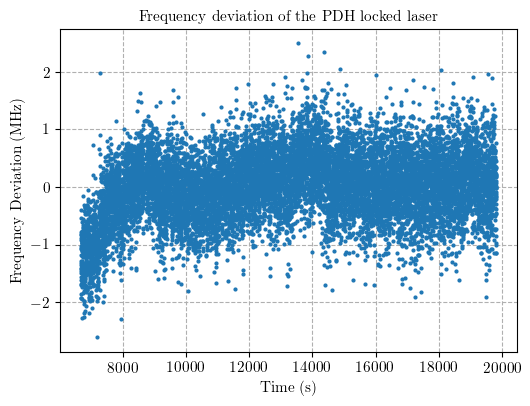

In [25]:
plt.plot(combined_time[::10],combined_freq_adjusted[::10],'.')
plt.xlabel("Time (s)")
plt.ylabel("Frequency Deviation (MHz)")
plt.title("Frequency deviation of the PDH locked laser")

# plt.savefig("PDH_locked_laser_241201Data_250323Analysis.pdf",dpi=300)

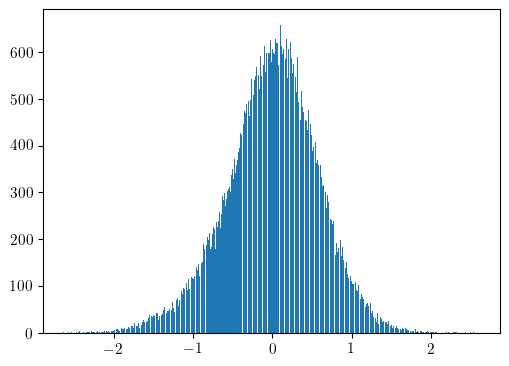

In [26]:
plt.hist(combined_freq_adjusted,bins=1000)
plt.grid(False)

In [27]:
# copy paste this code to the beginning of your script to set the plotting style for a two column figure

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    # "figure.constrained_layout.use": True
})

plt.rcParams["figure.autolayout"] = False # set to True if you want to use constrained_layout

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,3)
plt.rcParams["figure.titlesize"] = 10 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 10 # control title size
plt.rcParams["axes.labelsize"] = 10 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 10 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 10 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 7.5 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "upper left" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 2 #data point size

# CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"
# plt.rcParams["lines.linewidth"] = 1
# plt.rcParams["lines.markersize"] = 6 #data point size
# plt.rcParams["lines.markeredgewidth"] = 1.5 # width of the edge of the marker
# plt.rcParams["lines.markeredgecolor"] = "black" # color of the edge of the marker
# plt.rcParams["lines.markerfacecolor"] = "dodgerblue" # color of the inside of the marker
# plt.rcParams["lines.marker"] = "o" # marker type, see https://matplotlib.org/stable/api/markers_api.html for all options
# plt.rcParams["lines.color"] = "black" # color of the line
# # CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"

plt.rcParams["grid.linestyle"] = "--"
plt.rcParams['axes.grid'] = True
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
# plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7





# plot two figures side by side
# fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, constrained_layout=True)
# plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2) # remove unnecessary white space how i like it, this is manual very of use constrained_layout

# That warning is because matplotlib’s default layout engine has changed in recent
# versions to use constrained_layout, which is incompatible with subplots_adjust and tight_layout. 
# If you try to use plt.subplots_adjust when constrained_layout=True, matplotlib will raise that warning and ignore the call.
# If you're manually adjusting spacing, disable constrained_layout when you create the figure:

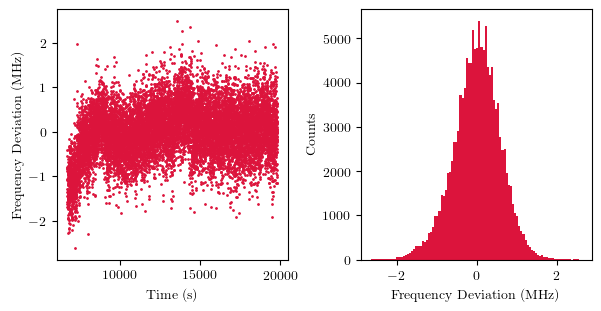

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True)

ax1.plot(combined_time[::10],combined_freq_adjusted[::10],'.',color='crimson')
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Frequency Deviation (MHz)")
# ax1.set_title("Frequency deviation of the PDH locked laser")
ax1.grid(False)

ax2.hist(combined_freq_adjusted,bins=100,color='crimson')
ax2.grid(False)
ax2.set_ylabel('Counts')
ax2.set_xlabel('Frequency Deviation (MHz)')

plt.savefig("250604 PDHLockingFrequencyDeviationLongTermTraceHistorgramTwoColumn.pdf",dpi=300)

In [ ]:
freq[100:105] + freq[110:115]

100   NaN
101   NaN
102   NaN
103   NaN
104   NaN
110   NaN
111   NaN
112   NaN
113   NaN
114   NaN
Name: 689.40165373, dtype: float64

In [ ]:
t[81075:148857]

81075      7863.606394
81076      7863.668493
81077      7863.730509
81078      7863.792741
81079      7863.854824
              ...     
148852    12072.251557
148853    12072.313611
148854    12072.375815
148855    12072.437793
148856    12072.499932
Name: Time  [ms], Length: 67782, dtype: float64

Text(0.5, 1.0, '221108 Wavelength drift with PDH on')

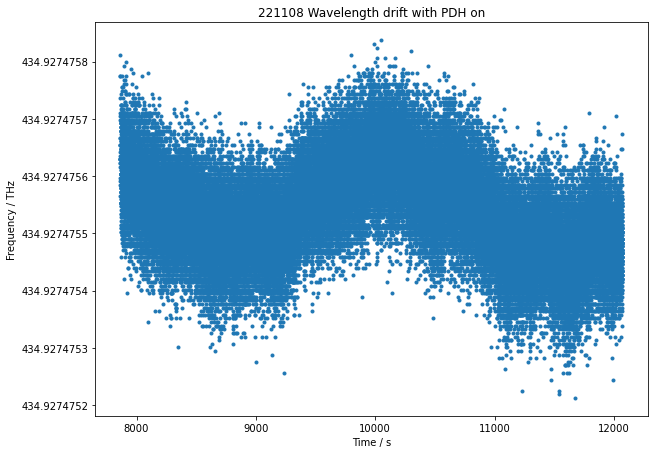

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(t[81075:148857],freq[81075:148857],'.')
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_useOffset(False)
plt.tight_layout()
plt.ylabel('Frequency / THz')
plt.xlabel('Time / s')
plt.title('221108 Wavelength drift with PDH on')
# plt.savefig('221108 Wavelength drift with PDH on.png',bbox_inches='tight',dpi=300)

# PDH Off

In [ ]:
filename = "WavelengthDriftPDHOff.xlsx"
df2 = pd.read_excel(filename,header=55)

In [ ]:
df2

,Time [ms],"Signal 7 Wavelength, vac. [nm]","Signal 1 Wavelength, vac. [nm]",Unnamed: 3,Unnamed: 4
0,6.426350e+01,689.292985,NaN,NaN,NaN
1,1.281801e+02,689.292984,NaN,NaN,NaN
2,1.924788e+02,689.292985,NaN,NaN,NaN
3,2.564411e+02,689.292984,NaN,NaN,NaN
4,3.205035e+02,689.292985,NaN,NaN,NaN
...,...,...,...,...,...
34851,2.414217e+06,689.293021,NaN,NaN,NaN
34852,2.414290e+06,689.293021,NaN,NaN,NaN
34853,2.414363e+06,689.293021,NaN,NaN,NaN
34854,2.414436e+06,689.293021,NaN,NaN,NaN


In [ ]:
t2 = df2.iloc[:,0]/1e3 #change from ms to seconds
t2

0           0.064263
1           0.128180
2           0.192479
3           0.256441
4           0.320503
            ...     
34851    2414.216756
34852    2414.289911
34853    2414.362983
34854    2414.436039
34855    2414.508976
Name: Time  [ms], Length: 34856, dtype: float64

In [ ]:
freq2 = (299792458/(df2.iloc[:,1]*1e-9))/1e12
freq2

0        434.927476
1        434.927476
2        434.927476
3        434.927476
4        434.927476
            ...    
34851    434.927453
34852    434.927453
34853    434.927453
34854    434.927453
34855    434.927453
Name: Signal 7  Wavelength, vac.  [nm], Length: 34856, dtype: float64

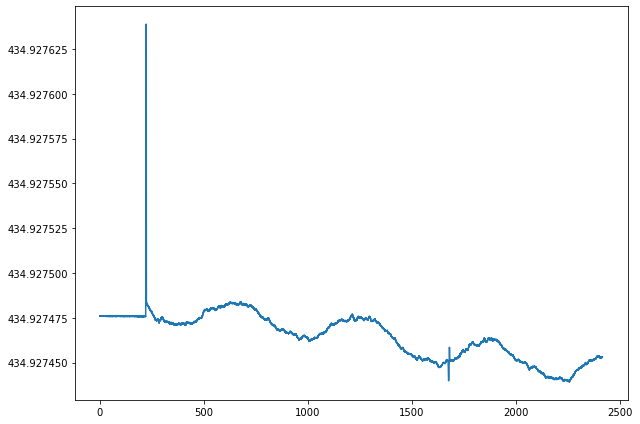

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(t2,freq2)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_useOffset(False)
plt.tight_layout()

In [ ]:
t2[3615:]

3615      232.663297
3616      232.727353
3617      232.791486
3618      232.855623
3619      232.919627
            ...     
34851    2414.216756
34852    2414.289911
34853    2414.362983
34854    2414.436039
34855    2414.508976
Name: Time  [ms], Length: 31241, dtype: float64

Text(0.5, 1.0, '221108 Wavelength drift with PDH off')

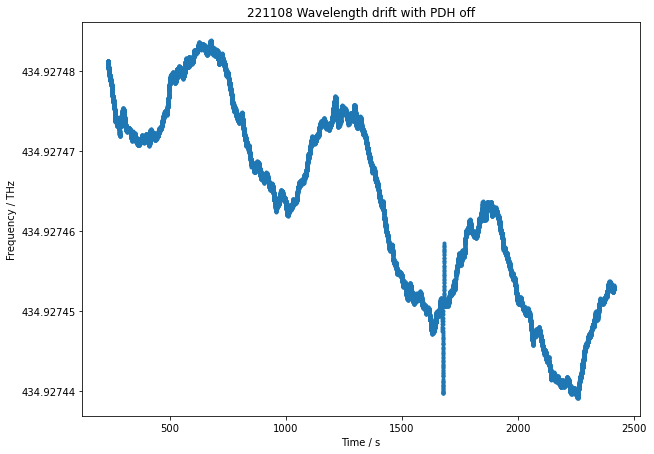

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(t2[3615:],freq2[3615:],'.')
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_useOffset(False)
plt.tight_layout()
plt.ylabel('Frequency / THz')
plt.xlabel('Time / s')
plt.title('221108 Wavelength drift with PDH off')
# plt.savefig('221108 Wavelength drift with PDH off.pdf',bbox_inches='tight',dpi=300)

# PDH On vs Off side-by-side comparison

In [ ]:
## On your .ipynb, import this plotting_style by adding in and uncommenting the following lines:

import matplotlib.pyplot as plt
import sys
sys.path.append('C:/Users/Michael/Dropbox/AION/Projects')  # Replace with the relevant path that contains this script
from plotting_style import set_plotting_style
set_plotting_style()

Initialising plotting style...
Success! Plotting style initialised.


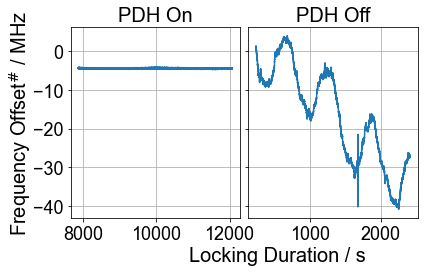

In [ ]:
fig, axs = plt.subplots(1,2,sharey=True)
ax1=axs[0]
ax2=axs[1]
ax1.get_yaxis().get_major_formatter().set_useOffset(False)
# plt.suptitle('221108 Wavelength drifts for PDH on and off',x=0.5,y=0.975)
ax1.set_ylabel(r'Frequency Offset$^{\#}$ / MHz',fontsize=20,labelpad=0)
fig.supxlabel('Locking Duration / s',x=0.65,y=0.065,fontsize=20)
ax1.set_title('PDH On',fontsize=20)
ax2.set_title('PDH Off',fontsize=20)
# ax1.set_xlabel('Time / s')
# ax2.set_xlabel('Time / s')
ax1.plot(t[81075:148857],[(i-434.92748)*1e6 for i in freq[81075:148857]])
ax2.plot(t2[3615:],[(i-434.92748)*1e6 for i in freq2[3615:]])
# ax1.plot(t[81075:148857],freq[81075:148857])
# ax2.plot(t2[3615:],freq2[3615:])
plt.tight_layout()
# plt.savefig('221108 Wavelength drifts for PDH on and off.pdf',bbox_inches='tight',dpi=300)

plt.subplots_adjust(wspace=0.05)

plt.savefig('Poster_TVLBAI_Wavelength drifts for PDH on and off.png',bbox_inches='tight',dpi=300)
plt.savefig('Poster_TVLBAI_Wavelength drifts for PDH on and off.pdf',bbox_inches='tight',dpi=300)

In [ ]:
[(i-434.92748)*1e6 for i in freq[81075:148857]]

[-4.402646425205603,
 -4.2638316699594725,
 -4.225973100346891,
 -4.345858542365022,
 -4.377407321953797,
 -4.333239132847666,
 -4.371097702460247,
 -4.188114587577729,
 -4.371097702460247,
 -4.345858542365022,
 -4.28907071636786,
 -4.371097702460247,
 -4.3584781224126345,
 -4.333239132847666,
 -4.225973100346891,
 -4.3016902395720535,
 -4.371097702460247,
 -4.295380449548247,
 -4.364787912436441,
 -4.408956215229409,
 -4.383717111977603,
 -4.377407321953797,
 -4.371097702460247,
 -4.345858542365022,
 -4.434195261637797,
 -4.4152660052532156,
 -4.459434364889603,
 -4.30800002959586,
 -4.28907071636786,
 -4.497292877658765,
 -4.396336692025216,
 -4.4152660052532156,
 -4.314309762776247,
 -4.377407321953797,
 -4.371097702460247,
 -4.333239132847666,
 -4.396336692025216,
 -4.3584781224126345,
 -4.396336692025216,
 -4.333239132847666,
 -4.440504994818184,
 -4.421575738433603,
 -4.490983144478378,
 -4.408956215229409,
 -4.396336692025216,
 -4.4152660052532156,
 -4.3206195528000535,
 -4.4657

In [ ]:
[(i-434.92748)*1e6 for i in freq2[3615:]]

[1.175183285795356,
 1.1310149830023875,
 1.1941125990233559,
 1.2130419122513558,
 1.2635200050681306,
 1.3329273542694864,
 1.3139980978849053,
 1.2761394714289054,
 1.2130419122513558,
 1.36447619070168,
 1.288759051476518,
 1.269829738248518,
 1.3392370874498738,
 1.3013785746807116,
 1.2067321222275496,
 1.156253972567356,
 1.2572101582009054,
 1.3013785746807116,
 1.0931564133898064,
 1.250900425020518,
 1.3076883647045179,
 1.156253972567356,
 1.0426783774164505,
 0.9985100177800632,
 1.1499441825435497,
 1.1120856697743875,
 0.9291026117352885,
 1.0931564133898064,
 0.9669611245044507,
 1.0426783774164505,
 0.8029073796933517,
 0.916483031687676,
 0.9732708576848381,
 0.8344561592821265,
 0.8975537753030949,
 0.6830218808318023,
 0.7776682195981266,
 0.7271901836247707,
 0.6640926244472212,
 0.49372897592547815,
 0.5378973355618655,
 0.5252778123576718,
 0.5000387659492844,
 0.5126582323100592,
 0.4432508831087034,
 0.47479971954089706,
 0.3612240107031539,
 0.45587046315631596